In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [38]:
df = pd.read_csv('yelp_Fall2023/Trips_by_Distance.csv')

In [39]:
print(df.head()) 
print(df['Month'].unique())

      Level        Date  State FIPS State Postal Code  County FIPS  \
0  National  2019/01/01         NaN               NaN          NaN   
1  National  2019/01/02         NaN               NaN          NaN   
2  National  2019/01/03         NaN               NaN          NaN   
3  National  2019/01/04         NaN               NaN          NaN   
4  National  2019/01/05         NaN               NaN          NaN   

  County Name  Population Staying at Home  Population Not Staying at Home  \
0         NaN                  77433867.0                     248733553.0   
1         NaN                  61305201.0                     264862219.0   
2         NaN                  63050480.0                     263116940.0   
3         NaN                  61803652.0                     264363768.0   
4         NaN                  64389745.0                     261777675.0   

   Number of Trips  Number of Trips <1  ...  Number of Trips 5-10  \
0     8.977844e+08         241667151.0  ...    

In [40]:
INwithCounty = df.loc[ (df['State Postal Code'] == 'IN') & (df['County FIPS'].notnull())]

In [41]:
PAwithCounty = df.loc[ (df['State Postal Code'] == 'PA') & (df['County FIPS'].notnull())]

In [42]:
scaled =( INwithCounty['Number of Trips <1'] - INwithCounty['Number of Trips <1'].mean() ) / INwithCounty['Number of Trips <1'].std()
scaled1_3 =( INwithCounty['Number of Trips 1-3'] - INwithCounty['Number of Trips 1-3'].mean() ) / INwithCounty['Number of Trips 1-3'].std()
#INwithCounty.plot(x= 'Month', y = ['Number of Trips <1', 'Number of Trips 1-3'], kind = 'bar')\


In [43]:
scaledPA = ( PAwithCounty['Number of Trips <1'] - PAwithCounty['Number of Trips <1'].mean() ) / PAwithCounty['Number of Trips <1'].std()
scaled1_3PA =( PAwithCounty['Number of Trips 1-3'] - PAwithCounty['Number of Trips 1-3'].mean() ) / PAwithCounty['Number of Trips 1-3'].std()

In [44]:
print(scaled.max())

12.610463113114767


<BarContainer object of 160172 artists>

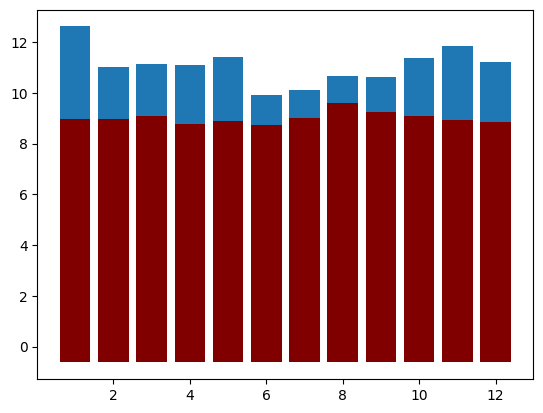

In [45]:
ax = plt.subplot() 
ax.bar(INwithCounty["Month"], scaled) 
ax.bar(INwithCounty["Month"], scaled1_3, color="maroon") 

<BarContainer object of 116647 artists>

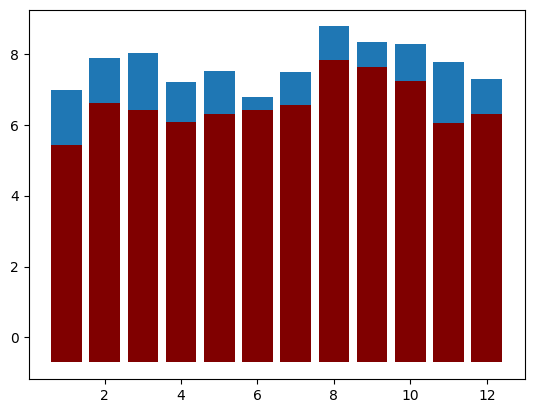

In [46]:
ax = plt.subplot() 
ax.bar(PAwithCounty["Month"], scaledPA) 
ax.bar(PAwithCounty["Month"], scaled1_3PA, color="maroon") 

In [47]:
INwithCounty.loc[INwithCounty['County FIPS'] == 18097.0]['County Name'].unique

<bound method Series.unique of 48590      Marion County
50074      Marion County
53207      Marion County
56817      Marion County
61098      Marion County
               ...      
5545412    Marion County
5548543    Marion County
5551620    Marion County
5554837    Marion County
5557914    Marion County
Name: County Name, Length: 1741, dtype: object>

In [48]:
mean_max = INwithCounty.groupby('County FIPS').agg({'Number of Trips <1': ['mean', 'max']})

In [49]:
mean_maxPA = PAwithCounty.groupby('County FIPS').agg({'Number of Trips <1': ['mean', 'max']})

In [50]:
mean_max['Number of Trips <1']['mean'].sort_values()

County FIPS
18115.0    4.984532e+03
18161.0    6.184860e+03
18171.0    7.132925e+03
18007.0    7.392836e+03
18025.0    7.907580e+03
               ...     
18057.0    2.976162e+05
18141.0    3.110567e+05
18003.0    3.963858e+05
18089.0    5.443389e+05
18097.0    1.110583e+06
Name: mean, Length: 92, dtype: float64

In [51]:
mean_maxPA['Number of Trips <1']['mean'].sort_values()

County FIPS
42113.0    5.619910e+03
42053.0    5.621523e+03
42023.0    6.367733e+03
42057.0    1.062293e+04
42105.0    1.365235e+04
               ...     
42045.0    5.970725e+05
42017.0    6.473113e+05
42091.0    8.247461e+05
42003.0    1.316025e+06
42101.0    1.787800e+06
Name: mean, Length: 67, dtype: float64

18057.0    2.976162e+05
18141.0    3.110567e+05
18003.0    3.963858e+05
18089.0    5.443389e+05
18097.0    1.110583e+06

This shows that compared to most counties in Indiana, most amount of trips take place in 18097 County, which is the Marion County that engulfs Indianapolis. 

What we see with Philadelphia is that the city consists of 5 different counties. 
Bucks County - 42017
Delaware County - 42045
Philadelphia County - 42101
Montgomery County - 42091
Chester (Not included in top 5 busiest counties)
Allegheny County - 42003

In [52]:
INwithCounty = INwithCounty.assign(Quarter= np.select([INwithCounty.Month <4,INwithCounty.Month <7,INwithCounty.Month <10, INwithCounty.Month <13  ], [1, 2, 3, 4], 0))

In [53]:
PAwithCounty = PAwithCounty.assign(Quarter= np.select([PAwithCounty.Month <4,PAwithCounty.Month <7,PAwithCounty.Month <10, PAwithCounty.Month <13  ], [1, 2, 3, 4], 0))

In [54]:
# Checking for correct assignment 
print(INwithCounty.loc[INwithCounty['Month']==1]['Quarter'].unique())
print(INwithCounty.loc[INwithCounty['Month']==7]['Quarter'].unique())
print(INwithCounty.loc[INwithCounty['Month']==9]['Quarter'].unique())
print(INwithCounty.loc[INwithCounty['Month']==12]['Quarter'].unique())

[1]
[3]
[3]
[4]


In [55]:
INwithCounty = INwithCounty.assign(scaled = scaled)
INwithCounty = INwithCounty.assign(scaled1_3 = scaled1_3)

In [56]:
PAwithCounty = PAwithCounty.assign(scaledpa = scaledPA)
PAwithCounty = PAwithCounty.assign(scaled1_3pa = scaled1_3PA)

In [57]:
INwithCounty.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Quarter,scaled,scaled1_3
48547,County,2019/01/01,18.0,IN,18183.0,Whitley County,7153.0,26811.0,90881.0,17389.0,...,1470.0,903.0,128.0,184.0,18-18183-20190101,0,1,1,-0.410093,-0.414204
48548,County,2019/01/01,18.0,IN,18181.0,White County,5409.0,18693.0,60846.0,11566.0,...,1274.0,676.0,75.0,86.0,18-18181-20190101,0,1,1,-0.450655,-0.488073
48549,County,2019/01/01,18.0,IN,18179.0,Wells County,6143.0,22153.0,71483.0,12252.0,...,1463.0,1547.0,338.0,84.0,18-18179-20190101,0,1,1,-0.445877,-0.466784
48550,County,2019/01/01,18.0,IN,18177.0,Wayne County,15456.0,50428.0,168973.0,41544.0,...,3664.0,1756.0,488.0,329.0,18-18177-20190101,0,1,1,-0.241832,-0.172095
48551,County,2019/01/01,18.0,IN,18175.0,Washington County,5384.0,22652.0,82132.0,18358.0,...,1004.0,536.0,231.0,86.0,18-18175-20190101,0,1,1,-0.403343,-0.456649


In [58]:
PAwithCounty.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Quarter,scaledpa,scaled1_3pa
47307,County,2019/01/01,42.0,PA,42001.0,Adams County,21320.0,81689.0,277795.0,49578.0,...,7280.0,2124.0,364.0,271.0,42-42001-20190101,0,1,1,-0.464404,-0.436608
47308,County,2019/01/01,42.0,PA,42003.0,Allegheny County,310544.0,905501.0,3240339.0,897498.0,...,28719.0,17208.0,4713.0,6125.0,42-42003-20190101,0,1,1,2.333079,2.761655
47309,County,2019/01/01,42.0,PA,42005.0,Armstrong County,14666.0,50069.0,168758.0,37207.0,...,2828.0,2118.0,193.0,313.0,42-42005-20190101,0,1,1,-0.505219,-0.539399
47310,County,2019/01/01,42.0,PA,42007.0,Beaver County,38533.0,125396.0,434495.0,105455.0,...,4585.0,3464.0,671.0,782.0,42-42007-20190101,0,1,1,-0.280053,-0.262233
47311,County,2019/01/01,42.0,PA,42009.0,Bedford County,10514.0,37374.0,128743.0,25345.0,...,3929.0,2496.0,343.0,157.0,42-42009-20190101,0,1,1,-0.544355,-0.597344


In [59]:
INwithCounty = INwithCounty.assign(business = scaled + scaled1_3)

In [60]:
PAwithCounty = PAwithCounty.assign(business = scaledPA + scaled1_3PA)

In [61]:
inQuarterlyNumbers = INwithCounty.groupby('Quarter').agg({'business': ['mean', 'max', 'sum']})

In [62]:
inMonthlyNumbers = INwithCounty.groupby('Month').agg({'business': ['mean', 'max', 'sum']})

In [63]:
paQuarterlyNumbers = PAwithCounty.groupby('Quarter').agg({'business': ['mean', 'max', 'sum']})

In [64]:
paMonthlyNumbers = PAwithCounty.groupby('Month').agg({'business': ['mean', 'max', 'sum']})

In [79]:
paMonthlyNumbers.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

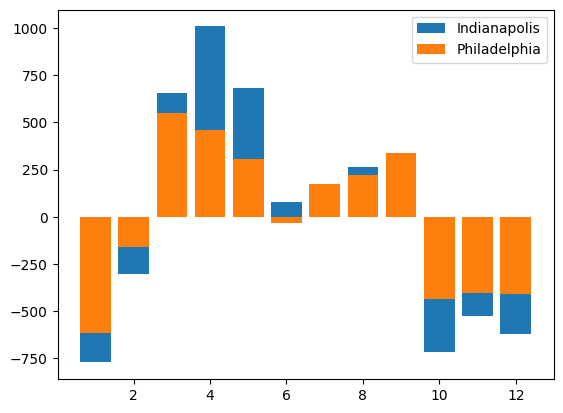

In [81]:

plt.bar(inMonthlyNumbers['business'].index, inMonthlyNumbers['business']['sum'], label='Indianapolis')
plt.bar(paMonthlyNumbers['business'].index, paMonthlyNumbers['business']['sum'], label='Philadelphia')

plt.legend()
plt.show()

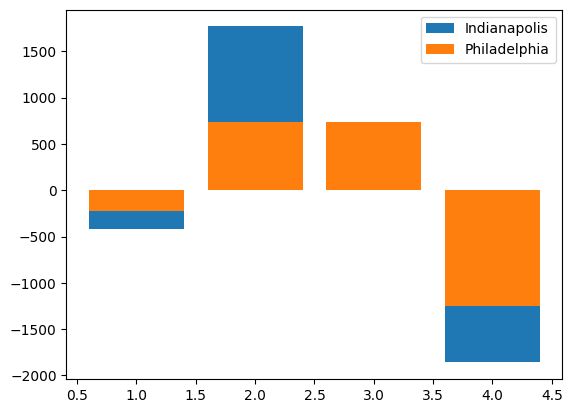

In [82]:
plt.bar(inQuarterlyNumbers['business'].index, inQuarterlyNumbers['business']['sum'], label='Indianapolis')
plt.bar(paQuarterlyNumbers['business'].index, paQuarterlyNumbers['business']['sum'], label='Philadelphia')

plt.legend()
plt.show()